In [2]:
#gerekli kütüphanelerin yüklenmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import os
import pyeeg #EEG / MEG segmentlerinden özellik çıkarmaya odaklanan bir Python modülü
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
%matplotlib notebook

In [3]:
#Dataset klasörü içindeki ayrı ayrı olan dataset'leri birleştirilir.
dirB= "./Datasets/setB/" 
tempB = []
for file in os.listdir(dirB):#bir dizin içindeki dosya ve klasörleri listeler
    f1=dirB +file 
    tempB.append(f1)
tempB = sorted(tempB)

dirC= "./Datasets/setC/" 
tempC = []
for file in os.listdir(dirC):#bir dizin içindeki dosya ve klasörleri listeler
    f1=dirC +file 
    tempC.append(f1)
tempC = sorted(tempC)

dirE= "./Datasets/setE/" 
tempE = []
for file in os.listdir(dirE):#bir dizin içindeki dosya ve klasörleri listeler
    f1=dirE +file 
    tempE.append(f1)
tempE = sorted(tempE)

    

In [4]:
#Küçük tablolar oluşturulur
tb=[]
st = 'A'#Sütun isimlendirme için
for i in range(len(tempB)):
    x = pd.read_table(tempB[i],header=None)
    x.columns=[st+str(i)]
    tb.append(x)
    
tc=[]
for i in range(len(tempC)):
    x = pd.read_table(tempC[i],header=None)
    x.columns=[st+str(i)]
    tc.append(x)
    
te=[]
for i in range(len(tempE)):
    x = pd.read_table(tempE[i],header=None)
    x.columns=[st+str(i)]
    te.append(x)

In [5]:
#Büyük tabloları oluşturmak için fonksiton hazırlanır
def table(table):
    big_table = None
    for ta in table:
        big_table = pd.concat([big_table, ta],axis=1)# küçük tablo ile verilerin tablosunu birleştirme 
    return big_table

In [6]:
#Büyük tablolar oluşturulur
bigB = table(tb)
bigC = table(tc)
bigE = table(te)
head = list(bigB.columns.values)

In [7]:
len(bigB.columns)#kolon sayısı

100

In [8]:
bigC.head(10)#bigC veri setindeki verilerin ilk 10 satırı 

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A90,A91,A92,A93,A94,A95,A96,A97,A98,A99
0,-42,50,-54,9,-76,-148,-27,-64,74,-41,...,7,-108,-11,133,38,-92,-82,-11,13,-62
1,-39,48,-56,-2,-10,-155,-26,-73,92,-35,...,30,-120,-9,129,56,-85,-82,-23,22,-64
2,-35,45,-57,-9,31,-156,-19,-79,94,-28,...,16,-137,-11,124,75,-68,-83,-22,29,-62
3,-35,41,-63,-17,44,-156,-13,-78,99,-23,...,10,-132,-8,102,85,-67,-82,-31,38,-59
4,-36,47,-60,-18,7,-150,-8,-80,91,-20,...,17,-113,-4,99,83,-99,-79,-30,41,-57
5,-37,51,-53,-16,-55,-147,-1,-72,65,-22,...,23,-90,0,106,94,-121,-75,-38,45,-63
6,-37,53,-43,-16,-51,-141,5,-75,42,-28,...,42,-87,-3,110,97,-146,-68,-31,43,-67
7,-39,40,-29,-33,-40,-135,6,-75,28,-33,...,31,-99,-4,114,98,-120,-68,-29,37,-61
8,-36,37,-25,-50,-11,-131,6,-76,12,-30,...,34,-97,-2,99,100,-99,-64,-32,32,-56
9,-22,25,-16,-56,-23,-124,5,-68,6,-31,...,39,-58,-5,83,96,-86,-66,-36,26,-38


In [9]:
#Her bir veri seti için alt matris oluşturmak için fonksiyon
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx

In [10]:
matB = creat_mat(bigB) # sağlıklı veriler
matC = creat_mat(bigC) # sağlıklıdan nöbete geçiş verileri
matE = creat_mat(bigE) # nöbet esnasındaki veriler

matB = np.nan_to_num(matB)
matC = np.nan_to_num(matC)
matE = np.nan_to_num(matE)


<IPython.core.display.Javascript object>


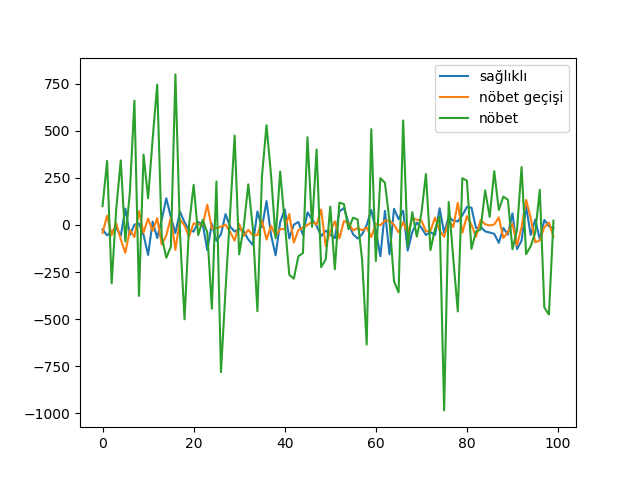

In [11]:
#veri noktalarının görselleştirilmesi
hl,      = plt.plot(matB[0],label='sağlıklı')
trans,   = plt.plot(matC[0],label='nöbet geçişi')
seizure, = plt.plot(matE[0],label='nöbet')
plt.legend(handles=[hl,trans,seizure])

In [12]:
# Bu fonksiyonda özellik değerlerini döndüren özellik çıkarma işlemleri yapılır
def features(mat):
    Kmax = 5
    Tau  = 4
    DE   = 10
    M    = 10
    R    = 0.3
    Band = np.arange(1,86)
    Fs   = 173
    DFA                = pyeeg.dfa(mat)
    HFD                = pyeeg.hfd(mat,Kmax)
    SVD_Entropy        = pyeeg.svd_entropy(mat,Tau,DE)
    Fisher_Information = pyeeg.fisher_info(mat,Tau,DE)
    PFD                = pyeeg.pfd(mat)
    sleep(0.01)
    
    return (DFA,HFD,SVD_Entropy,Fisher_Information,PFD)

In [13]:
# birinci sınıfın(B) özelliklerini oluşturma
f1_B    = np.zeros((100,1))
f2_B    = np.zeros((100,1))
f3_B    = np.zeros((100,1))
f4_B    = np.zeros((100,1))
f5_B    = np.zeros((100,1)) 
cl_B    = np.ones((100,1))


for i in range(100):
    [f1_B[i,0],f2_B[i,0],f3_B[i,0],f4_B[i,0],f5_B[i,0]]=features(matB[:,i])

C:\Users\Lenovo\anaconda3\lib\site-packages\pyeeg-0.4.4-py3.7.egg\pyeeg\detrended_fluctuation_analysis.py:125: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\Lenovo\anaconda3\lib\site-packages\pyeeg-0.4.4-py3.7.egg\pyeeg\detrended_fluctuation_analysis.py:131: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\Lenovo\anaconda3\lib\site-packages\pyeeg-0.4.4-py3.7.egg\pyeeg\fractal_dimension.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N ar

In [14]:
# ikiinci sınıfın(C) özelliklerini oluşturma
f1_C    = np.zeros((100,1))
f2_C    = np.zeros((100,1))
f3_C    = np.zeros((100,1))
f4_C    = np.zeros((100,1))
f5_C    = np.zeros((100,1))
cl_C    = np.zeros((100,1))

for i in range(100):
    [f1_C[i,0],f2_C[i,0],f3_C[i,0],f4_C[i,0],f5_C[i,0]]=features(matC[:,i])

In [15]:
# üçüncü sınıfın(E) özelliklerini oluşturma
f1_E    = np.zeros((100,1))
f2_E    = np.zeros((100,1))
f3_E    = np.zeros((100,1))
f4_E    = np.zeros((100,1))
f5_E    = np.zeros((100,1))
cl_E    = np.negative(np.ones((100,1))) # -1

for i in range(100):
    [f1_E[i,0],f2_E[i,0],f3_E[i,0],f4_E[i,0],f5_E[i,0]]=features(matE[:,i])

In [16]:
# Her Sınıf için Özellik ve sınıf matrisi oluşturulur
MftB = np.concatenate([f1_B,f2_B,f3_B,f4_B,f5_B,cl_B],axis=1)
MftC = np.concatenate([f1_C,f2_C,f3_C,f4_C,f5_C,cl_C],axis=1)
MftE = np.concatenate([f1_E,f2_E,f3_E,f4_E,f5_E,cl_E],axis=1)

In [17]:
FCM_B = pd.DataFrame(MftB,columns=['f1','f2','f3','f4','f5','class'])
FCM_C = pd.DataFrame(MftC,columns=['f1','f2','f3','f4','f5','class'])
FCM_E = pd.DataFrame(MftE,columns=['f1','f2','f3','f4','f5','class'])
FCM_B.head(4)

,f1,f2,f3,f4,f5,class
0,0.887621,0.185875,2.299474,2.299474,0.581396,1.0
1,0.783744,0.163794,2.299480,2.299480,0.588340,1.0
2,0.875873,0.154714,2.299477,2.299477,0.589802,1.0
3,0.881293,0.138396,2.299481,2.299481,0.592911,1.0


In [18]:
#sınıflara isim verilir 1= sağlıklı, 0= geçiş, -1= nöbet
TotalDataset = pd.concat([FCM_B,FCM_C,FCM_E],ignore_index=True)
visDat = TotalDataset.copy(deep=True)
visDat['class'] = visDat['class'].map({1:'healthy',0:'transation',-1:'seizure'})

In [19]:
import seaborn as sbn
sbn.set(style="whitegrid", palette="muted")

In [20]:
visDat.head(150)

,f1,f2,f3,f4,f5,class
0,0.887621,0.185875,2.299474,2.299474,0.581396,healthy
1,0.783744,0.163794,2.299480,2.299480,0.588340,healthy
2,0.875873,0.154714,2.299477,2.299477,0.589802,healthy
3,0.881293,0.138396,2.299481,2.299481,0.592911,healthy
4,0.798116,0.125291,2.299481,2.299481,0.595338,healthy
...,...,...,...,...,...,...
145,1.018873,0.273498,2.292315,2.292315,0.571728,transation
146,0.697436,0.163083,2.292313,2.292313,0.583579,transation
147,0.796639,0.226702,2.292310,2.292310,0.579184,transation
148,0.774271,0.156896,2.292312,2.292312,0.588938,transation


<IPython.core.display.Javascript object>


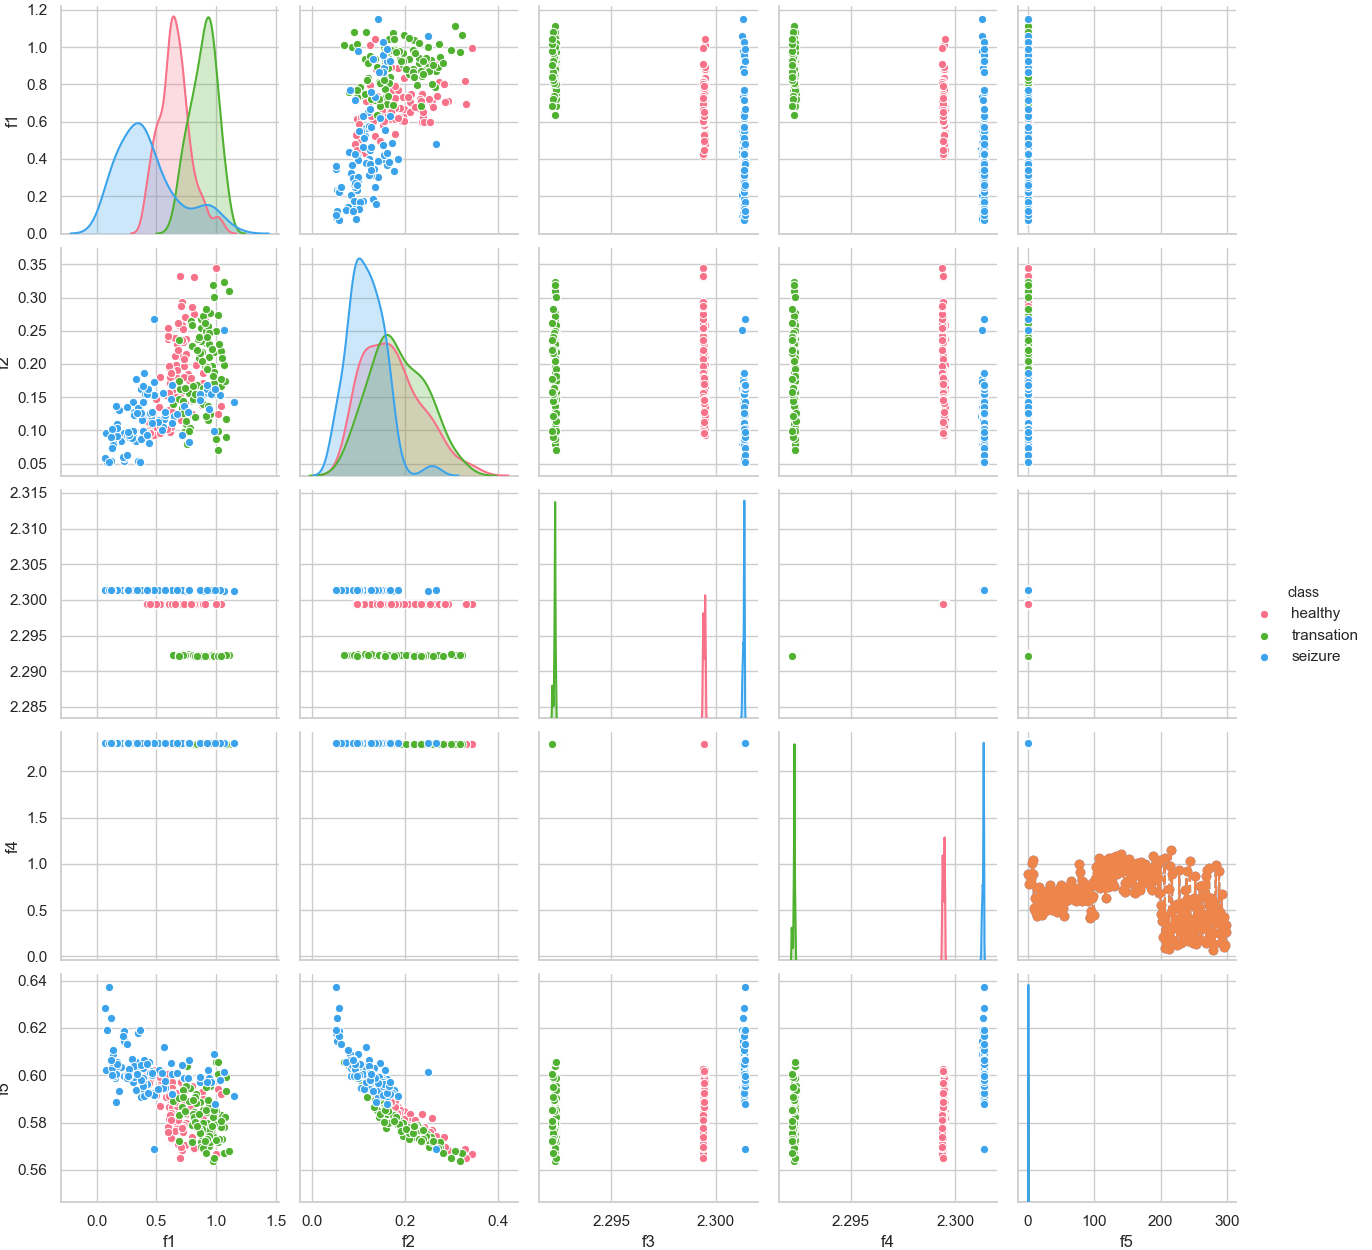

In [21]:
sbn.pairplot(visDat,hue='class',palette="husl")
plt.savefig("fig2.png") #değerler grafik ile gösterilir(sınıflara göre).

In [31]:
plt.plot(visDat['f1'],'--o')

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = TotalDataset[['f1','f2','f3','f4','f5']]
y = TotalDataset[['class']]
X = np.asarray(X)
y = np.asarray(y)

In [25]:
#verilerin eğitim ve test verilerine ayrilması(veri setinin yüzde 33 ü test yüzde 67 si eğitim verisi olarak kullanılmıştır)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
#eğitim ve test için gerekli kütüphaneler yüklenir
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [27]:
names = ["Nearest Neighbors", "Linear SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "AdaBoost",
         "Naive Bayes"]

In [28]:
#birçok sınıflandırma algoritmasından yararlanarak verilerin sınıflandırılması için hazılırlık yapılır
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB()]

In [29]:
#bir önceki adımda hazırlanan sınıflandırma çeşitleri verilere uygulanır
clf_score=[]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        clf_score.append([score,name])

In [30]:
clf_score

[[0.797979797979798, 'Nearest Neighbors'],
 [0.29292929292929293, 'Linear SVM'],
 [0.9494949494949495, 'Gaussian Process'],
 [1.0, 'Decision Tree'],
 [1.0, 'Random Forest'],
 [1.0, 'AdaBoost'],
 [1.0, 'Naive Bayes']]